# Load datasets

In [1]:
# Load relevant libraries
import pandas as pd
import plotly
import chart_studio.plotly as py
py.sign_in('Pragyas','ozM6LIihd5uZU9GyC12o')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load raw books dataset 
df_raw_books = pd.read_csv('Data/books.csv',header =0)
# Make a copy of df_raw_books
df_books = df_raw_books.copy(deep=True)

# Load raw books dataset 
df_raw_ratings = pd.read_csv('Data/ratings.csv',header = 0)
# Make a copy of df_raw_ratings
df_ratings = df_raw_ratings.copy(deep=True)

# Load raw books dataset 
df_raw_booktags = pd.read_csv('Data/book_tags.csv',header =0)
# Make a copy of df_raw_booktags
df_booktags = df_raw_booktags.copy(deep=True)

# Load raw books dataset 
raw_to_read_data = pd.read_csv('Data/to_read.csv',header=0)
# Make a copy of raw_to_read_data
to_read_data = raw_to_read_data.copy(deep=True)

# Load raw books dataset 
raw_tags = pd.read_csv('Data/tags.csv',header=0)
# Make a copy of raw_tags
tags = raw_tags.copy(deep=True)

In [4]:
# Print the dimension of df_ratings
pd.DataFrame([[df_ratings.shape[0], df_ratings.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,981756,3


In [5]:
# Print the dimension of df_booktags
pd.DataFrame([[df_booktags.shape[0], df_booktags.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,999912,3


In [6]:
# Print the first 5 rows of df_booktags
df_booktags.head()

,book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [7]:
# Print the first 5 rows of df_ratings
df_ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [8]:
#980K ratings for 10K books from 53K users
# Display shapes from all datasets
print(df_books.shape)
print(df_ratings.shape)
print(df_booktags.shape)
print(to_read_data.shape)
print(tags.shape)

(10000, 23)
(981756, 3)
(999912, 3)
(912705, 2)
(34252, 2)


In [9]:
# sort rating dataset by user_id and book_id
df_ratings = df_ratings.sort_values(by=['user_id','book_id'])
df_ratings.head()

,book_id,user_id,rating
117889,1180,1,4
488112,4893,1,3
625717,6285,1,4
796318,8034,2,4
875008,8855,2,5


In [10]:
# construct key using combination of book_id and user_id
df_ratings['key']=df_ratings.book_id.astype(str)+df_ratings.user_id.astype(str)

#deduping ratings
df_ratings = df_ratings.drop_duplicates('key',keep='first')

df_ratings.shape

(979310, 4)

In [11]:
# create new column to store user count
df_ratings['user_count']= df_ratings.groupby(['user_id'])['book_id'].transform('count')

df_ratings.head()

,book_id,user_id,rating,key,user_count
117889,1180,1,4,11801,3
488112,4893,1,3,48931,3
625717,6285,1,4,62851,3
796318,8034,2,4,80342,3
875008,8855,2,5,88552,3


In [12]:
# filter user count greater than two
df_ratings = df_ratings.loc[df_ratings['user_count']>2]

df_ratings['book_id'].nunique()

10000

In [13]:
user_fraction = 0.2
users = df_ratings['user_id'].unique()
sample_users = users[0:9500]

df_ratings_samp = df_ratings.loc[df_ratings['user_id'].isin(sample_users)]

df_ratings_samp.shape

(214231, 5)

In [14]:
df_ratings_samp.set_index(["rating",'user_id']).count(level="rating")

,book_id,key,user_count
rating,,,
1,4138,4138,4138
2,16929,16929,16929
3,63925,63925,63925
4,80887,80887,80887
5,48352,48352,48352


# Add new Features

In [15]:
#extracting tags from the tag name column
tags['tag_cleaned']=tags['tag_name'].str.extract(r"([a-z].*)", expand=False)

In [16]:
tags.head()

,tag_id,tag_name,tag_cleaned
0,0,-,NaN
1,1,--1-,NaN
2,2,--10-,NaN
3,3,--12-,NaN
4,4,--122-,NaN


In [17]:
#merge extracted tags with the booktags dataset containing tag ids only, to get the actual tag in words
tags_data = pd.merge(df_booktags, tags, how='left', on='tag_id')

tags_data.shape

(999912, 5)

In [18]:
tags_data = tags_data[['book_id','count','tag_id','tag_cleaned']]

df_booktags['book_id'].nunique()

10000

In [19]:
#selecting the tag with highest count of tags for each book
td=tags_data.sort_values(by=['book_id','count'],ascending=[1,0]).groupby('book_id').head(1)

td.head(100)

,book_id,count,tag_id,tag_cleaned
0,1,167697,30574,to-read
100,2,24549,30574,to-read
200,3,496107,30574,to-read
300,5,40087,11557,favorites
400,6,38378,11305,fantasy
500,8,2823,30574,to-read
600,10,3226,30574,to-read
700,11,32303,30574,to-read
800,13,75870,30574,to-read
900,21,33603,30574,to-read


In [20]:
tags_data['book_id'].count()

999912

#### To Read Dataset
##### Using this dataset to get a count of how many times each book has been put in the to-read list

In [21]:
to_read_data.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [22]:
#final to-read dataset with counts for each book-id
trd=to_read_data.groupby('book_id').count()[['user_id']].reset_index()

In [23]:
trd.head()

,book_id,user_id
0,1,973
1,2,400
2,3,287
3,4,1478
4,5,1293


### Merging the datasets created above - tags data and to read data- with the books datatset to create a final dataset with all features

In [24]:
data_frames = [df_books,td[['tag_cleaned','book_id']],trd[['user_id','book_id']]]
from functools import reduce

In [25]:
book_data_final = reduce(lambda  left,right: pd.merge(left,right,on=['book_id'],
                                            how='left'), data_frames).fillna('0')

In [26]:
book_data_final.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_cleaned,user_id
0,1,2767052,2767052,2792775,272,439023483,9.78044e+12,Suzanne Collins,2008,The Hunger Games,...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,favorites,0
1,2,3,3,4640799,491,439554934,9.78044e+12,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,to-read,287
2,3,41865,41865,3212258,226,316015849,9.78032e+12,Stephenie Meyer,2005,Twilight,...,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,young-adult,0
3,4,2657,2657,3275794,487,61120081,9.78006e+12,Harper Lee,1960,To Kill a Mockingbird,...,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,classics,50
4,5,4671,4671,245494,1356,743273567,9.78074e+12,F. Scott Fitzgerald,1925,The Great Gatsby,...,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,classics,48


In [27]:
## Rename user_id 
book_data_final = book_data_final.rename(columns={'user_id':'to_read_count'})

In [28]:
book_data_final['author_count']=book_data_final['authors'].str.split(',').apply(len)

In [29]:
book_data_final.shape

(10000, 26)

In [30]:
s = book_data_final['tag_cleaned'].value_counts()

book_data_final['tag_cleaned'] = np.where(book_data_final['tag_cleaned'].isin(s.index[s > 20]), book_data_final['tag_cleaned'], 'other')

In [31]:
t = book_data_final['language_code'].value_counts()

book_data_final['language_code'] = np.where(book_data_final['language_code'].isin(t.index[t > 20]), book_data_final['language_code'], 'other')

In [32]:
book_data_final['original_publication_year'] = book_data_final['original_publication_year'].astype(int)
book_data_final['to_read_count'] = book_data_final['to_read_count'].astype(int)

# Split train/test

In [33]:
target = 'avg_rating'

In [34]:
book_data_final['average_rating'].value_counts()

3.94    187
3.98    180
4.16    178
4.07    173
4.04    173
4.12    172
3.95    166
4.14    165
4.11    164
3.93    164
4.05    162
3.92    161
3.97    160
4.08    158
3.96    158
4.06    157
4.15    155
4.10    154
4.13    151
3.99    149
4.00    147
4.18    144
4.19    144
4.20    143
4.01    141
4.17    140
4.02    140
3.89    139
4.09    138
3.90    131
3.88    131
4.25    130
4.23    129
4.03    125
3.85    125
4.21    124
3.82    120
4.22    118
3.87    118
4.24    117
3.83    116
3.81    114
3.86    112
3.80    111
3.91    110
4.29    108
4.26    107
3.84    104
4.28    103
3.79    102
3.77     95
4.27     92
3.78     89
3.75     89
4.30     85
4.32     82
4.34     82
3.76     80
3.74     79
4.31     78
4.33     76
3.73     75
3.70     74
3.72     74
3.71     67
3.69     67
3.66     64
4.35     60
4.36     56
3.67     55
3.64     50
3.68     49
4.37     44
4.38     42
3.65     39
3.62     39
4.39     38
3.63     38
4.43     38
4.42     37
4.40     37
4.41     37
3.60     36
3.61

In [35]:
# create bins for ratings
bins = [1, 1.5, 2.5, 3.5, 4.5, 5]
labels = [1,2,3,4,5]
book_data_final['avg_rating'] = pd.cut(book_data_final['average_rating'], bins=bins, labels=labels)

In [36]:
book_data_final['avg_rating'].value_counts()

4    9516
3     354
5     129
2       1
1       0
Name: avg_rating, dtype: int64

In [37]:
book_data_final.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url', 'tag_cleaned', 'to_read_count', 'author_count',
       'avg_rating'],
      dtype='object')

In [38]:
book_data_final = book_data_final[book_data_final['avg_rating'] > 2]

In [39]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(book_data_final, train_size=0.8, random_state=42, stratify=book_data_final[target])

In [40]:
df_test = df_test.drop(columns=target)

# EDA

### Book Ratings

In [41]:
df_ratings_samp.head()

,book_id,user_id,rating,key,user_count
117889,1180,1,4,11801,3
488112,4893,1,3,48931,3
625717,6285,1,4,62851,3
796318,8034,2,4,80342,3
875008,8855,2,5,88552,3


In [42]:
df_train.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_cleaned,to_read_count,author_count,avg_rating
1572,1573,5360,5360,1125216,95,385337930,9.78039e+12,John Grisham,2001,A Painted House,...,6355,18253,21725,15711,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,to-read,162,1,4
6924,6925,13069935,13069935,18236079,13,316194689,9.78032e+12,A.S. King,2012,Ask the Passengers,...,1180,4270,6966,6030,https://images.gr-assets.com/books/1371850438m...,https://images.gr-assets.com/books/1371850438s...,to-read,0,1,4
7122,7123,32443,32443,2200679,52,425153975,9.78043e+12,"Leigh Nichols, Dean Koontz",1981,The Eyes of Darkness,...,789,4451,5099,4269,https://images.gr-assets.com/books/1328218196m...,https://images.gr-assets.com/books/1328218196s...,to-read,0,2,4
8758,8759,17707654,17707654,24757101,34,399157573,9.7804e+12,Patricia Cornwell,2013,Dust,...,1574,4035,4029,2898,https://images.gr-assets.com/books/1376882052m...,https://images.gr-assets.com/books/1376882052s...,to-read,0,1,4
4489,4490,10343389,10343389,15246115,52,1846057647,9.78185e+12,James Patterson,2011,Kill Alex Cross,...,988,5658,9447,8402,https://images.gr-assets.com/books/1338802382m...,https://images.gr-assets.com/books/1338802382s...,to-read,0,1,4


In [43]:
mean_ur=df_ratings_samp.groupby('user_id').mean()[['rating']]
mean_ur = mean_ur.reset_index()

Text(0.5, 0, 'Average Rating')

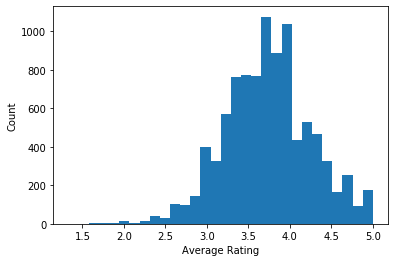

In [44]:
plt.hist(mean_ur['rating'],bins=30)
plt.ylabel('Count')
plt.xlabel('Average Rating')

# Books Data

In [45]:
import seaborn as sn
import matplotlib.pyplot as plt

In [46]:
pd.set_option('display.max_columns', None)
df_books.head(100)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,The Fault in Our Stars,eng,4.26,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,The Hobbit,en-US,4.25,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,The Catcher in the Rye,eng,3.79,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,"Angels & Demons (Robert Langdon, #1)",en-CA,3.85,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,Pride and Prejudice,eng,4.24,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


In [47]:
df_train.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_cleaned,to_read_count,author_count,avg_rating
1572,1573,5360,5360,1125216,95,385337930,9.78039e+12,John Grisham,2001,A Painted House,A Painted House,eng,3.67,59974,64092,3334,2048,6355,18253,21725,15711,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,to-read,162,1,4
6924,6925,13069935,13069935,18236079,13,316194689,9.78032e+12,A.S. King,2012,Ask the Passengers,Ask the Passengers,en-US,3.88,17896,18978,2325,532,1180,4270,6966,6030,https://images.gr-assets.com/books/1371850438m...,https://images.gr-assets.com/books/1371850438s...,to-read,0,1,4
7122,7123,32443,32443,2200679,52,425153975,9.78043e+12,"Leigh Nichols, Dean Koontz",1981,The Eyes of Darkness,The Eyes of Darkness,eng,3.85,14002,14761,296,153,789,4451,5099,4269,https://images.gr-assets.com/books/1328218196m...,https://images.gr-assets.com/books/1328218196s...,to-read,0,2,4
8758,8759,17707654,17707654,24757101,34,399157573,9.7804e+12,Patricia Cornwell,2013,Dust,"Dust (Kay Scarpetta, #21)",eng,3.53,9402,13154,1467,618,1574,4035,4029,2898,https://images.gr-assets.com/books/1376882052m...,https://images.gr-assets.com/books/1376882052s...,to-read,0,1,4
4489,4490,10343389,10343389,15246115,52,1846057647,9.78185e+12,James Patterson,2011,Kill Alex Cross,Kill Alex Cross (Alex Cross #18),eng,4.00,20206,24714,1499,219,988,5658,9447,8402,https://images.gr-assets.com/books/1338802382m...,https://images.gr-assets.com/books/1338802382s...,to-read,0,1,4


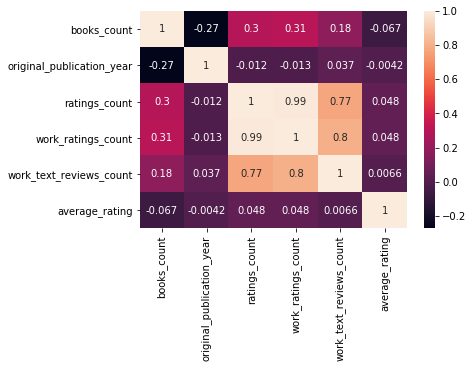

In [48]:
corrMatrix = df_train[['books_count','original_publication_year','ratings_count','work_ratings_count','work_text_reviews_count','average_rating']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

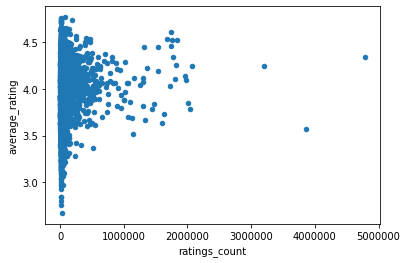

In [49]:
df_train.plot.scatter (x='ratings_count',y='average_rating')

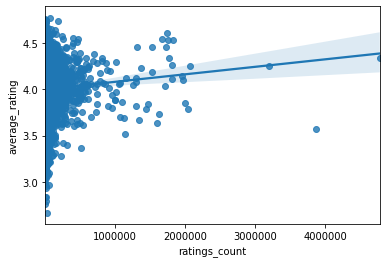

In [50]:
sn.regplot(df_train['ratings_count'],df_train['average_rating'])

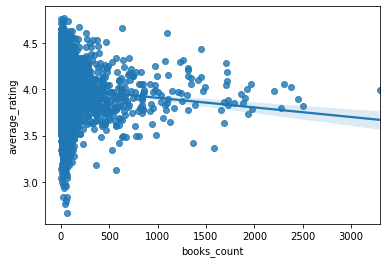

In [51]:
sn.regplot(df_train['books_count'],df_train['average_rating'])

In [52]:
df_train_subset = df_train.loc[df_train['author_count']<=10]

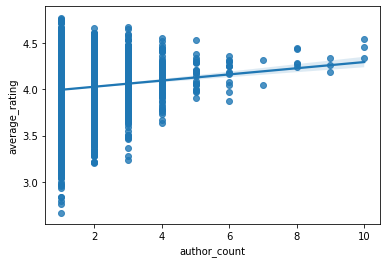

In [53]:
sn.regplot(df_train_subset['author_count'],df_train_subset['average_rating'])

In [54]:
df_train['to_read_count']=df_train['to_read_count'].astype(int)

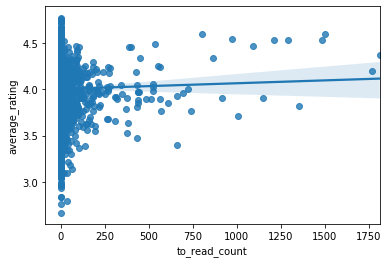

In [55]:
sn.regplot(df_train['to_read_count'],df_train['average_rating'])

### Data Cleaning

#### Dividing training into training and validation dataset

In [56]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=42, stratify=df_train[target])

# Reset the index
df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)

### Handling identifiers

#### Combining training, validation and test dataset

In [57]:
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)

#### Identifying the identifiers

In [58]:
def id_checker(df):
    """
    The identifier checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of identifiers
    """
    
    # Get the identifiers
    df_id = df[[var for var in df.columns 
                if df[var].nunique(dropna=True) == df[var].notnull().sum()]]
                
    return df_id

In [59]:
# Call id_checker on df
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,id,book_id,best_book_id,work_id
0,2564,8647,8647,4088
1,8581,502295,502295,3352513
2,469,41899,41899,4195128
3,5651,17673307,17673307,24673151
4,5078,4758093,4758093,4822885


#### Removing the identifiers

In [60]:
# Remove the identifiers from df_train
df_train = df_train.drop(columns=df_id.columns)

# Remove the identifiers from df_valid
df_valid = df_valid.drop(columns=df_id.columns)

# Remove the identifiers from df_test
df_test = df_test.drop(columns=df_id.columns)

In [61]:
# Print the first 5 rows of df_train
df_train.head()

,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_cleaned,to_read_count,author_count,avg_rating
0,34,1841492051,9.78184e+12,Orson Scott Card,2005,Shadow of the Giant,"Shadow of the Giant (Ender's Shadow, #4)",eng,3.98,37479,41690,885,372,1795,9330,16805,13388,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,to-read,20,1,4
1,19,316005274,9.78032e+12,"Jann S. Wenner, Corey Seymour",2007,Gonzo: The Life of Hunter S. Thompson,Gonzo: The Life of Hunter S. Thompson,en-US,4.07,9915,10108,252,78,324,2117,3879,3710,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,to-read,0,2,4
2,123,439321603,9.78044e+12,"Newt Scamander, J.K. Rowling, Albus Dumbledore",2001,Fantastic Beasts and Where to Find Them,Fantastic Beasts and Where to Find Them,eng,3.95,185928,209465,6523,2847,13155,52573,64027,76863,https://images.gr-assets.com/books/1303738520m...,https://images.gr-assets.com/books/1303738520s...,other,0,3,4
3,11,0,0,Penny Reid,2013,Neanderthal Seeks Human,"Neanderthal Seeks Human (Knitting in the City,...",eng,3.96,29612,29949,3104,811,1635,6111,10828,10564,https://images.gr-assets.com/books/1364347894m...,https://images.gr-assets.com/books/1364347894s...,to-read,0,1,4
4,30,61767581,9.78006e+12,Lauren Conrad,2009,L.A. Candy,"L.A. Candy (L.A. Candy, #1)",en-US,3.36,21910,23402,2076,1192,3587,8352,6128,4143,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,to-read,0,1,3


### Handling Missing Data

In [62]:
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)

#### Identifying Missing Data

In [63]:
def nan_checker(df):
    """
    The NaN checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of variables with NaN, their proportion of NaN and dtype
    """
    
    # Get the variables with NaN, their proportion of NaN and dtype
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])
    
    # Sort df_nan in accending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False).reset_index(drop=True)
    
    return df_nan

In [64]:
# Call nan_checker on df
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,avg_rating,0.20002,object


In [65]:
# Print the unique dtype of the variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,object


In [66]:
# Get the variables with missing values, their proportion of missing values and dtype
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype


### Removing missing values

In [67]:
# Remove rows with missing values from df_train
df_train = df_train.dropna(subset=np.intersect1d(df_miss['var'], df_train.columns),
                           inplace=False)

# Remove rows with missing values from df_valid
df_valid = df_valid.dropna(subset=np.intersect1d(df_miss['var'], df_valid.columns),
                           inplace=False)

# Remove rows with missing values from df_test
df_test = df_test.dropna(subset=np.intersect1d(df_miss['var'], df_test.columns),
                         inplace=False)

In [68]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6399,23


In [69]:
# Print the dimension of df_valid
pd.DataFrame([[df_valid.shape[0], df_valid.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1600,23


In [70]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,2000,22


### Remove irrelevant features

In [71]:
to_remove = ['isbn', 'isbn13', 'authors', 'original_title', 'title', 
             'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
            'image_url', 'small_image_url']

In [72]:
# Remove rows with irrelevant columns from df_train
df_train = df_train.drop(columns=to_remove)

# Remove rows with irrelevant columns from df_valid
df_valid = df_valid.drop(columns=to_remove)

# Remove rows with irrelevant columns values from df_test
df_test = df_test.drop(columns=to_remove)

In [73]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6399,11


In [74]:
# Print the dimension of df_valid
pd.DataFrame([[df_valid.shape[0], df_valid.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1600,11


In [75]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,2000,10


## Encoding the data

### Combining the training, validation and testing data


In [76]:
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)

# Print the unique dtype of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,int64
1,int32
2,object
3,float64


### Identifying the Categorical Variables

In [77]:
def cat_var_checker(df):
    """
    The categorical variable checker

    Parameters
    ----------
    df: the dataframe
    
    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """
    
    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           for var in df.columns if df[var].dtype == 'object'],
                          columns=['var', 'nunique'])
    
    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)
    
    return df_cat

In [78]:
# Call cat_var_checker on df
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,tag_cleaned,13
1,language_code,9
2,avg_rating,4


### Encoding the categorical features
